`python -m venv venv`

`.\venv\Scripts\activate`

In [384]:
# pip install pandas numpy matplotlib seaborn scikit-learn

In [385]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

In [386]:
df = pd.read_excel("../files/titanic3.xls")
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [387]:
# check dimensions
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

In [388]:
#find the title for each person
def find_title(name):
    strings = name.split()
    for string in strings:
        if string.endswith('.'):
            return string
        
    return None
df['title'] = df['name'].apply(find_title)

df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss.
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master.
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss.
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr.
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs.


In [389]:
title_avg_age = df.groupby('title')['age'].mean()
# Fill in missing ages based on title with the average age
df = df.merge(title_avg_age, on='title', suffixes=('', '_avg'))
df['age'].fillna(df['age_avg'], inplace=True)
df.drop(columns=['age_avg'], inplace=True)

print(df)
    

      pclass  survived                               name     sex   age  \
0          1         1      Allen, Miss. Elisabeth Walton  female  29.0   
1          1         0       Allison, Miss. Helen Loraine  female   2.0   
2          1         1  Andrews, Miss. Kornelia Theodosia  female  63.0   
3          1         1       Barber, Miss. Ellen "Nellie"  female  26.0   
4          1         1              Bazzani, Miss. Albina  female  32.0   
...      ...       ...                                ...     ...   ...   
1304       2         0             Lahtinen, Rev. William    male  30.0   
1305       2         0              Montvila, Rev. Juozas    male  27.0   
1306       2         0      Peruschitz, Rev. Joseph Maria    male  41.0   
1307       2         1          Reynaldo, Ms. Encarnacion  female  28.0   
1308       3         0            O'Donoghue, Ms. Bridget  female  28.0   

      sibsp  parch  ticket      fare    cabin embarked boat  body  \
0         0      0   24160  21

In [390]:
#fill in average fare with total average
avg_fare = df['fare'].mean()

df['fare'].fillna(avg_fare, inplace=True)

In [391]:

# df['cabin'] = df['cabin'].fillna('X')

# df['cabin'] = df['cabin'].apply(lambda x: str(x)[0])

df['embarked'] = df['embarked'].fillna('X')

df['home.dest'] = df['home.dest'].fillna('X')

home_value_counts = df['home.dest'].value_counts()
print(home_value_counts)

# cabin_value_counts = df['cabin'].value_counts()
# print(cabin_value_counts)



embarking_value_counts = df['embarked'].value_counts()
print(embarking_value_counts)

# df['embarked'] = df[embarking_value_counts[0]]

# embarking_value_counts = df['embarked'].value_counts()

# print(embarking_value_counts)




X                           564
New York, NY                 64
London                       14
Montreal, PQ                 10
Paris, France                 9
                           ... 
Clevedon, England             1
Auburn, NY                    1
Seattle, WA / Toledo, OH      1
Walthamstow, England          1
Spain                         1
Name: home.dest, Length: 370, dtype: int64
S    914
C    270
Q    123
X      2
Name: embarked, dtype: int64


In [392]:
#check if someone had a cabin
df['is_cabin'] = df['cabin'].isnull()
df.drop(['cabin'], axis=1,inplace=True)

In [393]:
# check dimensions
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   embarked   1309 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home.dest  1309 non-null   object 
 13  title      1309 non-null   object 
 14  is_cabin   1309 non-null   bool   
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 154.7+ KB


pclass       False
survived     False
name         False
sex          False
age          False
sibsp        False
parch        False
ticket       False
fare         False
embarked     False
boat          True
body          True
home.dest    False
title        False
is_cabin     False
dtype: bool

In [394]:
df.head()
print(df['embarked'].unique())

['S' 'C' 'X' 'Q']


In [395]:
#encode the sex
df['sex'] = df['sex'].astype('category')
enc = OneHotEncoder()

df_encoded =  enc.fit_transform(df[['sex']])
sex_encoded_df = pd.DataFrame.sparse.from_spmatrix(df_encoded, columns=enc.get_feature_names_out(['sex']))

df = pd.concat([df, sex_encoded_df], axis=1)

In [396]:
#encode the embarking location
df['embarked'] = df['embarked'].astype('category')

df_encoded =  enc.fit_transform(df[['embarked']])
embarked_encoded_df = pd.DataFrame.sparse.from_spmatrix(df_encoded, columns=enc.get_feature_names_out(['embarked']))

df = pd.concat([df, embarked_encoded_df], axis=1)

In [397]:
# #encode the Title 
# df['title'] = df['title'].astype('category')

# df_encoded =  enc.fit_transform(df[['title']])
# title_encoded_df = pd.DataFrame.sparse.from_spmatrix(df_encoded, columns=enc.get_feature_names_out(['title']))

# df = pd.concat([df, title_encoded_df], axis=1)

In [398]:
df = df.drop('sex', axis=1)
df = df.drop('embarked', axis=1)
# df = df.drop('title', axis=1)



In [399]:
print(df.head())

   pclass  survived                               name   age  sibsp  parch  \
0       1         1      Allen, Miss. Elisabeth Walton  29.0      0      0   
1       1         0       Allison, Miss. Helen Loraine   2.0      1      2   
2       1         1  Andrews, Miss. Kornelia Theodosia  63.0      1      0   
3       1         1       Barber, Miss. Ellen "Nellie"  26.0      0      0   
4       1         1              Bazzani, Miss. Albina  32.0      0      0   

   ticket      fare boat  body                        home.dest  title  \
0   24160  211.3375    2   NaN                     St Louis, MO  Miss.   
1  113781  151.5500  NaN   NaN  Montreal, PQ / Chesterville, ON  Miss.   
2   13502   77.9583   10   NaN                       Hudson, NY  Miss.   
3   19877   78.8500    6   NaN                                X  Miss.   
4   11813   76.2917    8   NaN                                X  Miss.   

   is_cabin  sex_female  sex_male  embarked_C  embarked_Q  embarked_S  \
0     False  

In [400]:
# begin making the model
# split the data
feature_cols = df.columns.tolist()
feature_cols.remove('survived')
feature_cols.remove('name')
feature_cols.remove('body')
feature_cols.remove('boat')
feature_cols.remove('ticket')
feature_cols.remove('home.dest')
feature_cols.remove('title')


X = df[feature_cols]
y = df['survived']

print(feature_cols)
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 70% training and 30% test


['pclass', 'age', 'sibsp', 'parch', 'fare', 'is_cabin', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S', 'embarked_X']


In [401]:
#check contents of X
print(X)

      pclass   age  sibsp  parch      fare  is_cabin  sex_female  sex_male  \
0          1  29.0      0      0  211.3375     False         1.0       0.0   
1          1   2.0      1      2  151.5500     False         1.0       0.0   
2          1  63.0      1      0   77.9583     False         1.0       0.0   
3          1  26.0      0      0   78.8500      True         1.0       0.0   
4          1  32.0      0      0   76.2917     False         1.0       0.0   
...      ...   ...    ...    ...       ...       ...         ...       ...   
1304       2  30.0      1      1   26.0000      True         0.0       1.0   
1305       2  27.0      0      0   13.0000      True         0.0       1.0   
1306       2  41.0      0      0   13.0000      True         0.0       1.0   
1307       2  28.0      0      0   13.0000      True         1.0       0.0   
1308       3  28.0      0      0    7.7500      True         1.0       0.0   

      embarked_C  embarked_Q  embarked_S  embarked_X  
0       

In [402]:
#print contents of y
print(y)

0       1
1       0
2       1
3       1
4       1
       ..
1304    0
1305    0
1306    0
1307    1
1308    0
Name: survived, Length: 1309, dtype: int64


In [403]:
clf_rf = RandomForestClassifier(n_estimators=1001, max_leaf_nodes=16, n_jobs=1)
clf_lr = LogisticRegression(max_iter=1000)

clf_rf = clf_rf.fit(X_train, y_train)
clf_lr = clf_lr.fit(X_train, y_train)

C:\Users\emree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\emree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:836: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = array.astype(new_dtype)


C:\Users\emree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\emree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:836: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = array.astype(new_dtype)


C:\Users\emree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\emree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:836: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = array.astype(new_dtype)


rf accuracy: 0.8015267175572519


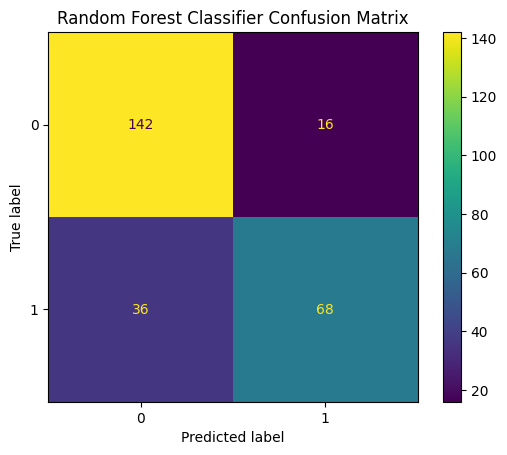

In [404]:
rf_y_pred = clf_rf.predict(X_test)

print("rf accuracy:", metrics.accuracy_score(y_test, rf_y_pred))

#random forest confusion matrix

rf_cm = confusion_matrix(y_test, rf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=np.unique(y))

disp.plot()
plt.title("Random Forest Classifier Confusion Matrix")

plt.show()

C:\Users\emree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\emree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:836: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = array.astype(new_dtype)


lr accuracy: 0.7786259541984732


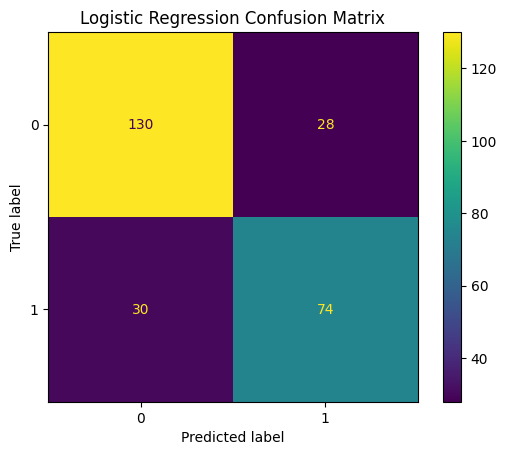

In [405]:
lr_y_pred = clf_lr.predict(X_test)

print("lr accuracy:", metrics.accuracy_score(y_test, lr_y_pred))

#lr confusion matrix

lr_cm = confusion_matrix(y_test, lr_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=np.unique(y))

disp.plot()
plt.title("Logistic Regression Confusion Matrix")

plt.show()

<Axes: >

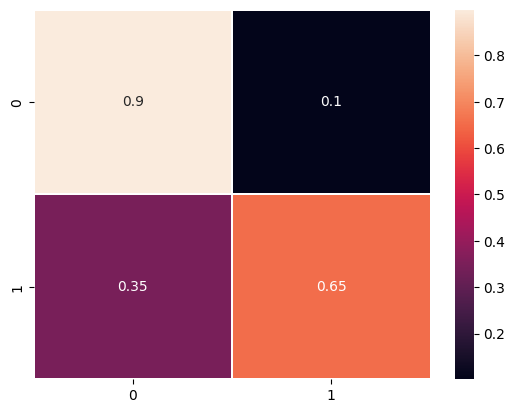

In [406]:
#Create normalized Confusion Matrix
rf_cm_normalized = rf_cm.astype('float') / rf_cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(rf_cm_normalized, annot=True, linewidths = 0.01)

<Axes: >

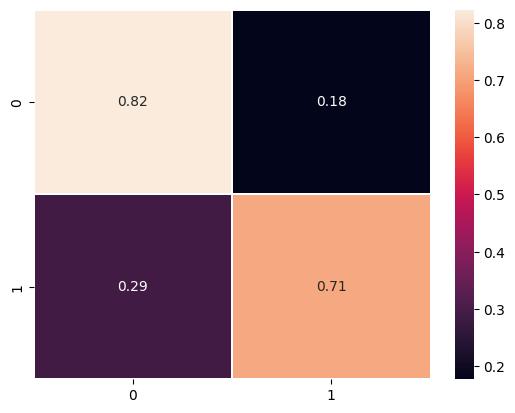

In [407]:
#Create normalized Confusion Matrix
lr_cm_normalized = lr_cm.astype('float') / lr_cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(lr_cm_normalized, annot=True, linewidths = 0.01)

In [408]:
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,boat,body,home.dest,title,is_cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_X
0,1,1,"Allen, Miss. Elisabeth Walton",29.0,0,0,24160,211.3375,2,NaN,"St Louis, MO",Miss.,False,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,"Allison, Miss. Helen Loraine",2.0,1,2,113781,151.5500,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss.,False,1.0,0.0,0.0,0.0,1.0,0.0
2,1,1,"Andrews, Miss. Kornelia Theodosia",63.0,1,0,13502,77.9583,10,NaN,"Hudson, NY",Miss.,False,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,"Barber, Miss. Ellen ""Nellie""",26.0,0,0,19877,78.8500,6,NaN,X,Miss.,True,1.0,0.0,0.0,0.0,1.0,0.0
4,1,1,"Bazzani, Miss. Albina",32.0,0,0,11813,76.2917,8,NaN,X,Miss.,False,1.0,0.0,1.0,0.0,0.0,0.0
